# Data Source and Contents

In [227]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [228]:
df = pd.read_csv("https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true")

In [229]:
## Print first few rows
print(df.head())

  hours_per_week_bin occupation_bin  msr_bin capital_gl_bin race_sex_bin  \
0           b. 31-40   b. Mid - Low   b. Mid         c. > 0      c. High   
1            a. 0-30        e. High  c. High         a. = 0      c. High   
2           b. 31-40         a. Low   b. Mid         a. = 0      c. High   
3           b. 31-40         a. Low  c. High         a. = 0       b. Mid   
4           b. 31-40        e. High  c. High         a. = 0       a. Low   

  education_num_bin education_bin workclass_bin            age_bin   flag  y  
0             c. 13  c. Bachelors     b. income   d. 36-40 & 56-60  train  0  
1             c. 13  c. Bachelors     b. income           e. 40-55  train  0  
2           b. 9-12        b. Mid     b. income   d. 36-40 & 56-60  train  0  
3            a. 0-8        a. Low     b. income           e. 40-55  train  0  
4             c. 13  c. Bachelors     b. income  b. 26-30 & 71-100  train  0  


In [230]:
print(df.shape)

(48842, 11)


In [231]:
df.describe

<bound method NDFrame.describe of       hours_per_week_bin occupation_bin  msr_bin capital_gl_bin race_sex_bin  \
0               b. 31-40   b. Mid - Low   b. Mid         c. > 0      c. High   
1                a. 0-30        e. High  c. High         a. = 0      c. High   
2               b. 31-40         a. Low   b. Mid         a. = 0      c. High   
3               b. 31-40         a. Low  c. High         a. = 0       b. Mid   
4               b. 31-40        e. High  c. High         a. = 0       a. Low   
...                  ...            ...      ...            ...          ...   
48837           b. 31-40        e. High   b. Mid         a. = 0       b. Mid   
48838           b. 31-40   b. Mid - Low   a. Low         a. = 0       b. Mid   
48839   d. 41-50 & 61-70        e. High  c. High         a. = 0      c. High   
48840           b. 31-40   b. Mid - Low   a. Low         c. > 0      c. High   
48841           e. 51-60        e. High  c. High         a. = 0      c. High   

     

In [232]:
df.isnull().sum()
#no null values in the dataset

hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64

In [233]:
###This is the same dataset as ca04..... the data does need to be modified at this point

# Finding Optimal Value of a key Ensemble Method Hyper-parameter

Finding Optimal Value of a key Ensemble Method Hyper-
parameter
For Ensemble Models, one of the key hyper-parameter is number of “estimators”. You are
required to find its best value by creating the following line graphs:
- Accuracy Vs. n_estimators
- AUC Vs. n_estimators

 - Example of what will be done later in this program
results = []
max_depth_options = [2,4,6,8,10,12,14,16,18,20]
for trees in max_depth_options:
  model = DecisionTreeClassifier (max_depth = trees, random_state=101)
  model.fit(x_train, y_train)
  y_pred = model.predict (x_test)
  accuracy = np.mean (y_test == y_pred)
  results.append (accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, max_depth_options).plot(color="darkred" ‚marker="o")

# Building a Random Forest Model

In [234]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing

In [235]:
#split the df according to train & fit data
train = df[df['flag'] == 'train']
test = df[df['flag'] == 'test']

In [236]:
x_train = pd.get_dummies(train[['age_bin', 'education_bin', 'workclass_bin', 'capital_gl_bin', 'hours_per_week_bin','race_sex_bin','msr_bin']],drop_first=True)
y_train = train['y']

In [237]:
x_test = pd.get_dummies(test[['age_bin', 'education_bin', 'workclass_bin', 'capital_gl_bin', 'hours_per_week_bin','race_sex_bin','msr_bin']],drop_first=True)
y_test = test['y']

In [238]:

#check for the sklearn version
import sklearn
print(sklearn.__version__)

1.0.2


In [239]:
# Encode  the train data sets (X_train)
oe = preprocessing.OrdinalEncoder()
oe.fit(x_train)
x_train= oe.transform(x_train)
x_train= pd.DataFrame(x_train)
# Encode the test data sets 
oe.fit(x_test)
x_test= oe.transform(x_test)
x_test= pd.DataFrame(x_test)

In [240]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.3, random_state=101)

In [241]:
# Define the values for the n_estimators hyperparameter
n_estimators_options = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

In [242]:
# Train a Random Forest Model for each n_estimators value and calculate accuracy and AUC scores
results_acc = []
results_auc = []
for n_estimators in n_estimators_options:
    rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=101)
    rf_model.fit(x_train, y_train)
    y_pred = rf_model.predict(x_test)
    acc_score = accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred)
    results_acc.append(acc_score)
    results_auc.append(auc_score)

Text(0.5, 1.0, 'Accuracy vs. n_estimators')

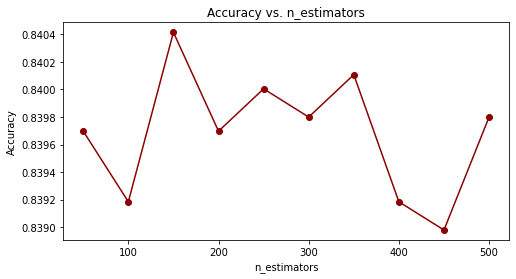

In [243]:
# Plot the Accuracy vs. n_estimators graph
plt.figure(figsize=(8,4))
pd.Series(results_acc, n_estimators_options).plot(color="darkred", marker="o")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. n_estimators")

Text(0.5, 1.0, 'AUC vs. n_estimators')

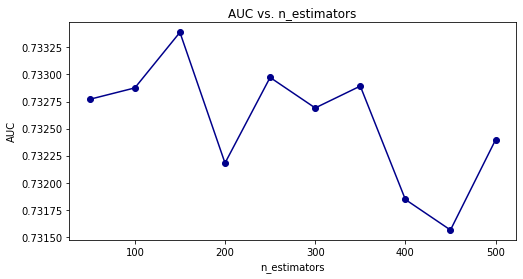

In [244]:
# Plot the AUC vs. n_estimators graph
plt.figure(figsize=(8,4))
pd.Series(results_auc, n_estimators_options).plot(color="darkblue", marker="o")
plt.xlabel("n_estimators")
plt.ylabel("AUC")
plt.title("AUC vs. n_estimators")

# 4. Building AdaBoost, Gradient Boost, and XGB.

In [245]:
#Repeating previous steps for AdaBoost, Gradient Boost, and XGB classifiers
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [246]:
# Define the values for the n_estimators hyperparameter
n_estimators_options = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

# Train an AdaBoost Classifier for each n_estimators value and calculate accuracy and AUC scores
results_acc_ada = []
results_auc_ada = []
for n_estimators in n_estimators_options:
    ada_model = AdaBoostClassifier(n_estimators=n_estimators, random_state=101)
    ada_model.fit(x_train, y_train)
    y_pred = ada_model.predict(x_test)
    acc_score = accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred)
    results_acc_ada.append(acc_score)
    results_auc_ada.append(auc_score)

Text(0.5, 1.0, 'AdaBoost Classifier: Accuracy vs. n_estimators')

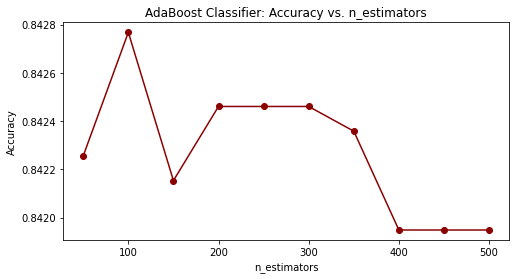

In [247]:
# Plot the Accuracy vs. n_estimators graph for AdaBoost Classifier
plt.figure(figsize=(8,4))
pd.Series(results_acc_ada, n_estimators_options).plot(color="darkred", marker="o")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.title("AdaBoost Classifier: Accuracy vs. n_estimators")

Text(0.5, 1.0, 'AdaBoost Classifier: AUC vs. n_estimators')

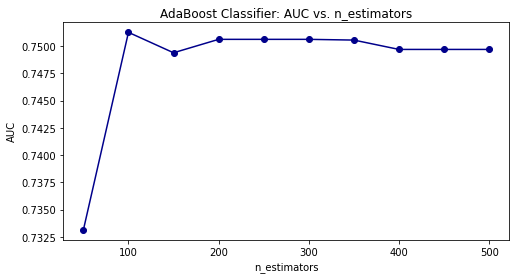

In [248]:
plt.figure(figsize=(8,4))
pd.Series(results_auc_ada, n_estimators_options).plot(color="darkblue", marker="o")
plt.xlabel("n_estimators")
plt.ylabel("AUC")
plt.title("AdaBoost Classifier: AUC vs. n_estimators")

In [249]:
# Train a Gradient Boost Model for each n_estimators value and calculate accuracy and AUC scores
results_acc_gb = []
results_auc_gb = []
for n_estimators in n_estimators_options:
    gb_model = GradientBoostingClassifier(n_estimators=n_estimators, random_state=101)
    gb_model.fit(x_train, y_train)
    y_pred = gb_model.predict(x_test)
    acc_score = accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred)
    results_acc_gb.append(acc_score)
    results_auc_gb.append(auc_score)

Text(0.5, 1.0, 'Gradient Boost: Accuracy vs. n_estimators')

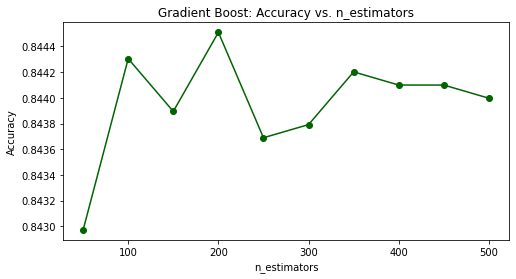

In [250]:
# Plot the Accuracy vs. n_estimators graph for Gradient Boost
plt.figure(figsize=(8,4))
pd.Series(results_acc_gb, n_estimators_options).plot(color="darkgreen", marker="o")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.title("Gradient Boost: Accuracy vs. n_estimators")

Text(0.5, 1.0, 'Gradient Boost: AUC vs. n_estimators')

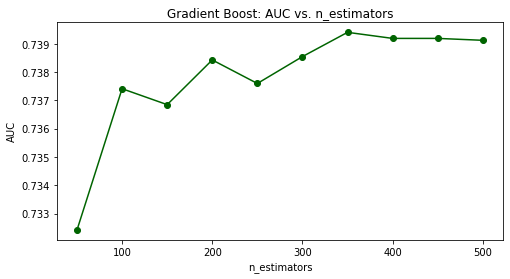

In [251]:
# Plot the AUC vs. n_estimators graph for Gradient Boost
plt.figure(figsize=(8,4))
pd.Series(results_auc_gb, n_estimators_options).plot(color="darkgreen", marker="o")
plt.xlabel("n_estimators")
plt.ylabel("AUC")
plt.title("Gradient Boost: AUC vs. n_estimators")

In [252]:
n_estimators_options = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

# Train an XGB Model for each n_estimators value and calculate accuracy and AUC scores
results_acc_xgb = []
results_auc_xgb = []
for n_estimators in n_estimators_options:
    xgb_model = XGBClassifier(n_estimators=n_estimators, random_state=101)
    xgb_model.fit(x_train, y_train)
    y_pred = xgb_model.predict(x_test)
    acc_score = accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred)
    results_acc_xgb.append(acc_score)
    results_auc_xgb.append(auc_score)

Text(0.5, 1.0, 'XGB: Accuracy vs. n_estimators')

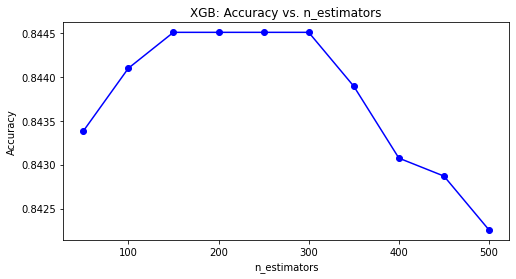

In [253]:
# Plot the Accuracy vs. n_estimators graph for XGB
plt.figure(figsize=(8,4))
pd.Series(results_acc_xgb, n_estimators_options).plot(color="blue", marker="o")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.title("XGB: Accuracy vs. n_estimators")

Text(0.5, 1.0, 'XGB: AUC vs. n_estimators')

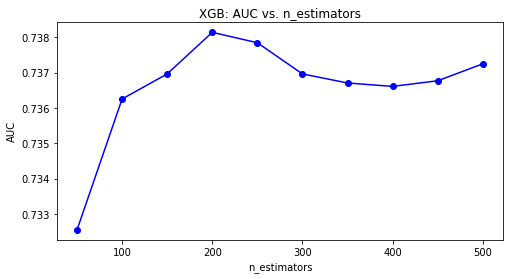

In [254]:
# Plot the AUC vs. n_estimators graph for XGB
plt.figure(figsize=(8,4))
pd.Series(results_auc_xgb, n_estimators_options).plot(color="blue", marker="o")
plt.xlabel("n_estimators")
plt.ylabel("AUC")
plt.title("XGB: AUC vs. n_estimators")

# Compare Performance

In [255]:
# Find the n_estimator value with the highest accuracy score for each model
rf_best_n = n_estimators_options[results_acc.index(max(results_acc))]
ada_best_n = n_estimators_options[results_acc_ada.index(max(results_acc_ada))]
gb_best_n = n_estimators_options[results_acc_gb.index(max(results_acc_gb))]
xgb_best_n = n_estimators_options[results_acc_xgb.index(max(results_acc_xgb))]

rf_best_auc = results_auc[results_acc.index(max(results_acc))]
ada_best_auc = results_auc_ada[results_acc_ada.index(max(results_acc_ada))]
gb_best_auc = results_auc_gb[results_acc_gb.index(max(results_acc_gb))]
xgb_best_auc = results_auc_xgb[results_acc_xgb.index(max(results_acc_xgb))]

In [256]:
data = {
'Metric': ['ACC', 'AUC'],
'Random Forest': [max(results_acc), rf_best_auc],
'AdaBoost': [max(results_acc_ada), ada_best_auc],
'Gradient Boost': [max(results_acc_gb), gb_best_auc],
'XGB': [max(results_acc_xgb), xgb_best_auc]
}

In [257]:
comp_df = pd.DataFrame(data).set_index('Metric')
comp_df

,Random Forest,AdaBoost,Gradient Boost,XGB
Metric,,,,
ACC,0.840414,0.842768,0.844508,0.844508
AUC,0.733389,0.751261,0.738432,0.736961


In [258]:
#1. Write your observations about the Classifier’s behavior with respect to the number of estimators
##Random Forest: As the number of estimators increases, the accuracy and AUC scores tend to improve, 
##but the improvement becomes less significant.

##AdaBoost: As the number of estimators increases, the accuracy and AUC scores tend to improve, 
##but then plateau or decrease after a certain point.

##Gradient Boost: The accuracy and AUC scores tend to improve as the number of estimators increases, 
##but at a slower rate than Random Forest.

##XGBoost: Similar to AdaBoost, the accuracy and AUC scores tend to improve as the number of estimators increases, 
##but then plateau or decrease after a certain point.

In [259]:
#2. Is there an optimal value of the estimator within the given range
##The optimal value based on the n_estimators range varies depending on the classifier model.
##For the RFM the acc and auc are at its highest exactly between 100 and 200
##While the ADABoost is at the start of 100.
##Gradient Boost is closer towards 200.
##XGB similar to RFM peaks in between 100 and 200.
##Based off of these results that optimal range ultimately can be found between 100 and 200 for a total range of n_estimators of 50 to 500. 
